### Integrantes

- Juan José Naranjo Velasquez 
- Diego Alejandro Mora Suarez
- Kenneth David Leonel Triana

Dependencias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import multivariate_normal

d:\programasProgramacion\anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Importar base de datos

In [3]:
datosAerolineas = pd.read_excel("data/EastWestAirlines.xlsx", engine="openpyxl", sheet_name="data")
datosAerolineas.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


###  Limpieza de los datos de la aérolinea

Revisión de nulos

In [4]:
#Revisar que no tengan datos nulos los campos de la aérolinea

datosAerolineas.isnull().sum()


ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [5]:
#Revisar datos máximos y minimos con el método describe
datosAerolineas.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


Al analizar los datos se determina que el campo ID no es relevante ese identificadro unico para todo el proceso de clusterización

In [6]:
#Eliminar columna ID
datosAerolineas = datosAerolineas.drop(columns="ID#")
#Dejar para manipular más facil los datos dejar las columna en minuscula
datosAerolineas.columns = datosAerolineas.columns.str.lower()
#Renombrar columna award para que no quede con el simbolo de pregunta 
datosAerolineas.rename(columns={"award?": "award"}, inplace=True)
datosAerolineas.head()

,balance,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


### Escalar los datos

In [7]:
#Se escalan los datos ya que hay unas feature donde sus valores son muy altos 
scaler = MinMaxScaler()
datosAerolineas_escalados = scaler.fit_transform(datosAerolineas)
datosAerolineas_escalados = pd.DataFrame(datosAerolineas_escalados, columns=datosAerolineas.columns)
datosAerolineas_escalados.head()

,balance,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


Visualizar datos

d:\programasProgramacion\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\programasProgramacion\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\programasProgramacion\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\programasProgramacion\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: Fut

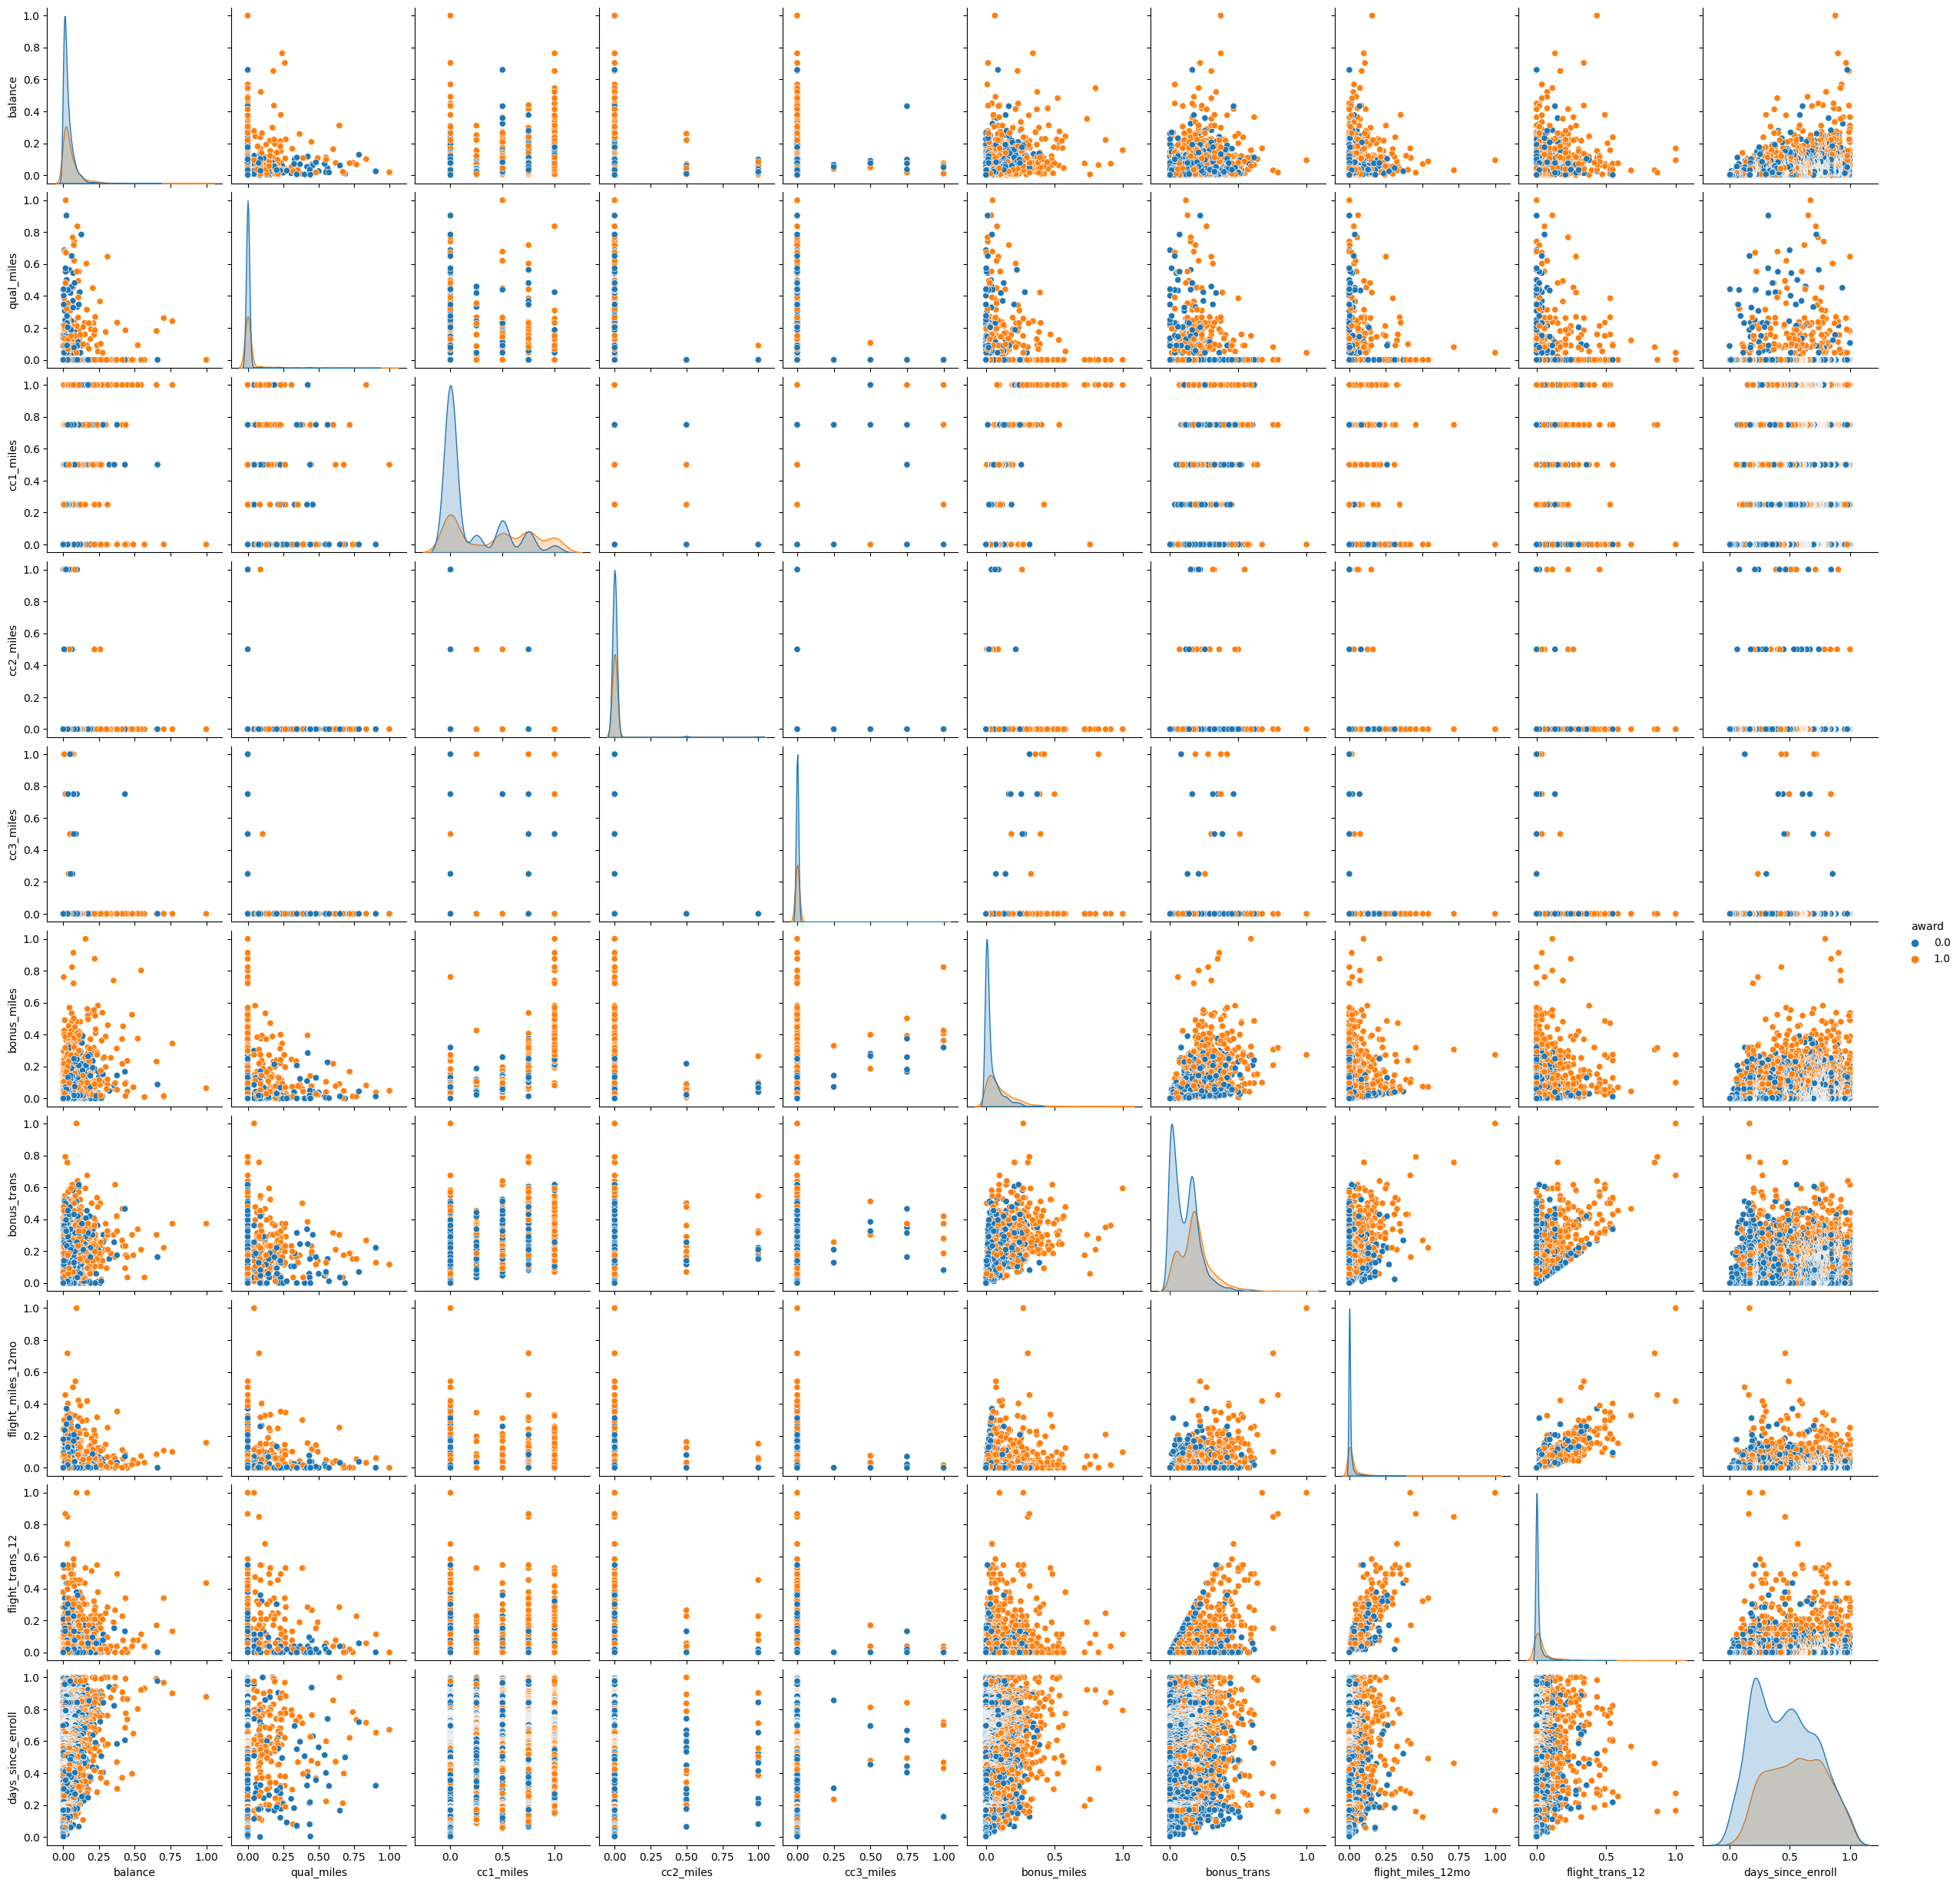

In [8]:
sns.pairplot(datosAerolineas_escalados, hue='award')

Después de ver los resultados podemos ver que las características qual_miles y days_since_enroll son las qeu detallan una mejor dispersión de los datos ya que las otras se ven muy agrupados.

In [9]:
datosAerolineas_escalados.head()

,balance,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [10]:
# Seleccionemos como prueba los features 1, 9 que son las que mejor dispersión tiene en la gráfica anterior
X_2d = datosAerolineas_escalados.iloc[:,[1,9]]
X_2d

,qual_miles,days_since_enroll
0,0.0,0.843742
1,0.0,0.839884
2,0.0,0.847842
3,0.0,0.837955
4,0.0,0.835905
...,...,...
3994,0.0,0.168917
3995,0.0,0.167953
3996,0.0,0.168797
3997,0.0,0.168676


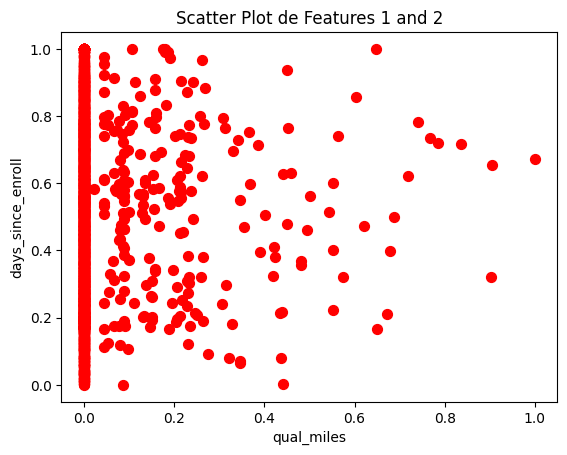

In [11]:
plt.scatter(X_2d.iloc[:,0], X_2d.iloc[:,1], marker='o', color='r', s=50)
plt.xlabel('qual_miles')
plt.ylabel('days_since_enroll')
plt.title('Scatter Plot de Features 1 and 2')
plt.show()

Se empieza a evaluar los parámetros 

In [12]:
# Inicializar aleatoriamente los theta_old
# Fija el número de clusters K = 3
np.random.seed(42)
pi1 = 0.33
pi2 = 0.33
pi3 = 0.33
mu_1 = np.random.randn(2,) + np.reshape([0,0.7],(2,))
mu_2 = np.random.randn(2,) + np.reshape([0.5,0.2],(2,))
mu_3 = np.random.randn(2,) + np.reshape([0.5,0.7],(2,))

In [13]:
aux = np.random.randn(2,2)
print(aux)
print(aux.T)
print(aux.T@aux)

[[ 1.57921282  0.76743473]
 [-0.46947439  0.54256004]]
[[ 1.57921282 -0.46947439]
 [ 0.76743473  0.54256004]]
[[2.71431932 0.95722472]
 [0.95722472 0.88332746]]


In [14]:
aux = np.random.randn(2,2)
Sigma_1 =0.01*aux.T@aux
aux2 = np.random.randn(2,2)
Sigma_2 = 0.2*aux2.T@aux2
aux3 = np.random.randn(2,2)
Sigma_3 = 0.01*aux3.T@aux3
print(Sigma_1, np.linalg.det(Sigma_1))
print(Sigma_2, np.linalg.det(Sigma_2))
print(Sigma_3, np.linalg.det(Sigma_3))


[[ 0.00273302 -0.00247114]
 [-0.00247114  0.03877545]] 9.98674331226338e-05
[[0.80023368 0.13032406]
 [0.13032406 0.08298373]] 0.04942201496645322
[[0.02972634 0.00951497]
 [0.00951497 0.02045577]] 0.000517540431702083


Ya que al ver los resultados de nuestras matrices de covarianzas y ver el determinate que apesar de que sean pequños no son negativos

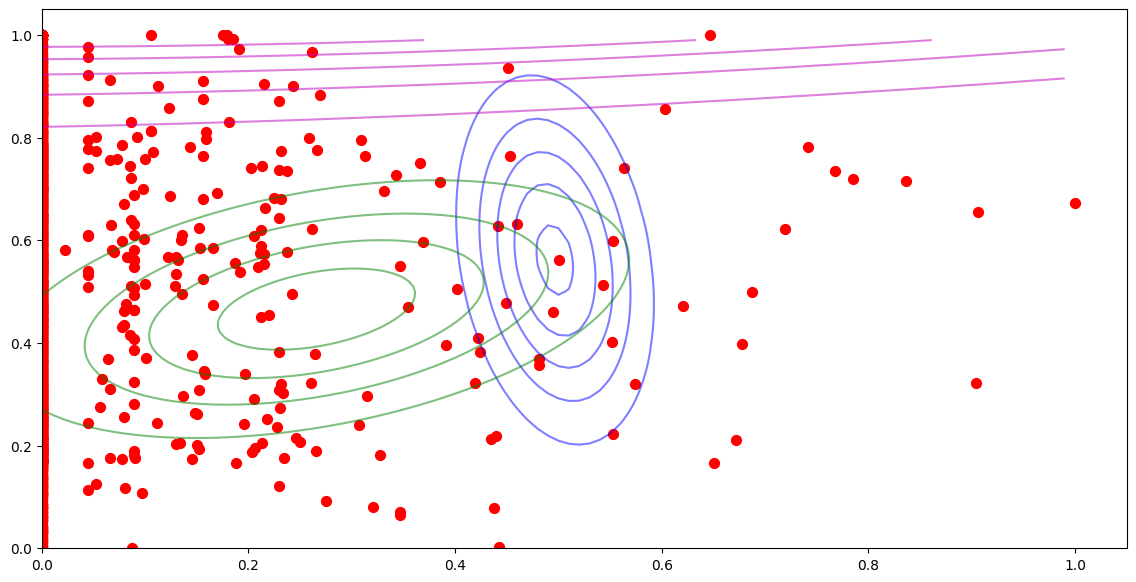

In [15]:
# Graficamos el ajuste inicial
# Se crea la matriz de datos
x, y = np.mgrid[0:1:.01, 0:1:.01]
pos = np.dstack((x, y))

# Calculate the Gaussian probability density function for each class
rv1 = multivariate_normal(mu_1, Sigma_1)
rv2 = multivariate_normal(mu_2, Sigma_2)
rv3 = multivariate_normal(mu_3, Sigma_3)
z1 = rv1.pdf(pos)
z2 = rv2.pdf(pos)
z3 = rv3.pdf(pos)

# Plot the Gaussian distributions
plt.figure(figsize=(14, 7))
plt.contour(x, y, z1, levels=5, colors='b', alpha=0.5)
plt.contour(x, y, z2, levels=5, colors='m', alpha=0.5)
plt.contour(x, y, z3, levels=5, colors='g', alpha=0.5)
plt.scatter(X_2d.iloc[:,0], X_2d.iloc[:,1], marker='o', color='r', s=50)


In [16]:
gama_Znk = np.zeros((X_2d.shape[0],3)) # Matriz de responsabilidades o Posterior P(zn|xn)

for n in range(X_2d.shape[0]):
  x_n = X_2d.iloc[n,:]
  for k in range(3):
    if k == 0:
      gama_Znk[n,k] = pi1 * multivariate_normal.pdf(x_n, mu_1, Sigma_1)/(pi1 * rv1.pdf(x_n) + pi2 * rv2.pdf(x_n) + pi3 * rv3.pdf(x_n))
    if k == 1:
      gama_Znk[n,k] = pi2 * multivariate_normal.pdf(x_n, mu_2, Sigma_2)/(pi1 * rv1.pdf(x_n) + pi2 * rv2.pdf(x_n) + pi3 * rv3.pdf(x_n))
    if k == 2:
      gama_Znk[n,k] = pi3 * multivariate_normal.pdf(x_n, mu_3, Sigma_3)/(pi1 * rv1.pdf(x_n) + pi2 * rv2.pdf(x_n) + pi3 * rv3.pdf(x_n))

print(gama_Znk)

[[2.46282461e-17 5.89247069e-01 4.10752931e-01]
 [2.37374362e-17 5.53620208e-01 4.46379792e-01]
 [2.54698753e-17 6.26251252e-01 3.73748748e-01]
 ...
 [4.14183438e-23 1.43160588e-07 9.99999857e-01]
 [4.13641115e-23 1.42988744e-07 9.99999857e-01]
 [4.12019482e-23 1.42474960e-07 9.99999858e-01]]


In [17]:
len(X_2d)

3999

In [18]:
X_2d.columns

Index(['qual_miles', 'days_since_enroll'], dtype='object')

In [ ]:
# Construirmos el modelo discriminante
#Se tiene en cuenta que nuestro dataset es de 3999 por eso N1,N2 y N3 tienen el valor de 1333
N1, N2, N3 = 1333,1333,1333
N = N1+N2+N3
piC1 = N1/N
piC2 = N2/N
piC3 = N3/N

X_d2 = X_2d

X_C1 = X_d2.iloc[:1333,:]
X_C2 = X_d2.iloc[1333:2666,:]
X_C3 = X_d2.iloc[2666:,:]

muC1 = np.mean(X_C1, axis=0)
muC2 = np.mean(X_C2, axis=0)
muC3 = np.mean(X_C3, axis=0)

M1 = np.tile(muC1, (N1,1))
M2 = np.tile(muC2, (N2,1))
M3 = np.tile(muC3, (N3,1))

S1 = (1./N1) * (X_C1 - M1).T.dot(X_C1 - M1)
S2 = (1./N2) * (X_C2 - M2).T.dot(X_C2 - M2)
S3 = (1./N3) * (X_C3 - M3).T.dot(X_C3 - M3)

Sigma = (N1/N)*S1 + (N2/N)*S2 + (N3/N)*S3

In [20]:
w_C1 = np.linalg.inv(Sigma).dot(muC1)
w_C2 = np.linalg.inv(Sigma).dot(muC2)
w_C3 = np.linalg.inv(Sigma).dot(muC3)

w_10 = -0.5 * (muC1.T.dot(np.linalg.inv(Sigma)).dot(muC1)) + np.log(piC1)
w_20 = -0.5 * (muC2.T.dot(np.linalg.inv(Sigma)).dot(muC2))+ np.log(piC2)
w_30 = -0.5 * (muC3.T.dot(np.linalg.inv(Sigma)).dot(muC3))+ np.log(piC3)

A1 = w_C1.T.dot(X_d2.T) + w_10
A2 = w_C2.T.dot(X_d2.T) + w_20
A3 = w_C3.T.dot(X_d2.T) + w_30

A = np.vstack((A1,A2,A3)).T

In [21]:
postCk = np.exp(A) / np.sum(np.exp(A), axis=1, keepdims=True)
postCk

array([[9.98277230e-01, 1.72276643e-03, 3.46552394e-09],
       [9.98064218e-01, 1.93577739e-03, 4.31793133e-09],
       [9.98477972e-01, 1.52202548e-03, 2.74335336e-09],
       ...,
       [5.40144848e-09, 6.96003614e-03, 9.93039958e-01],
       [5.36454014e-09, 6.93775259e-03, 9.93062242e-01],
       [5.25531914e-09, 6.87132614e-03, 9.93128669e-01]])

In [22]:
Sigma

,qual_miles,days_since_enroll
qual_miles,0.004813,-0.000049
days_since_enroll,-0.000049,0.009802


C:\Users\USER\AppData\Local\Temp\ipykernel_18164\1856146888.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(muC1[0], muC1[1], marker='d', color='b', s=100, label='Class 1')
C:\Users\USER\AppData\Local\Temp\ipykernel_18164\1856146888.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(muC2[0], muC2[1], marker='d', color='g', s=100, label='Class 2')
C:\Users\USER\AppData\Local\Temp\ipykernel_18164\1856146888.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavio

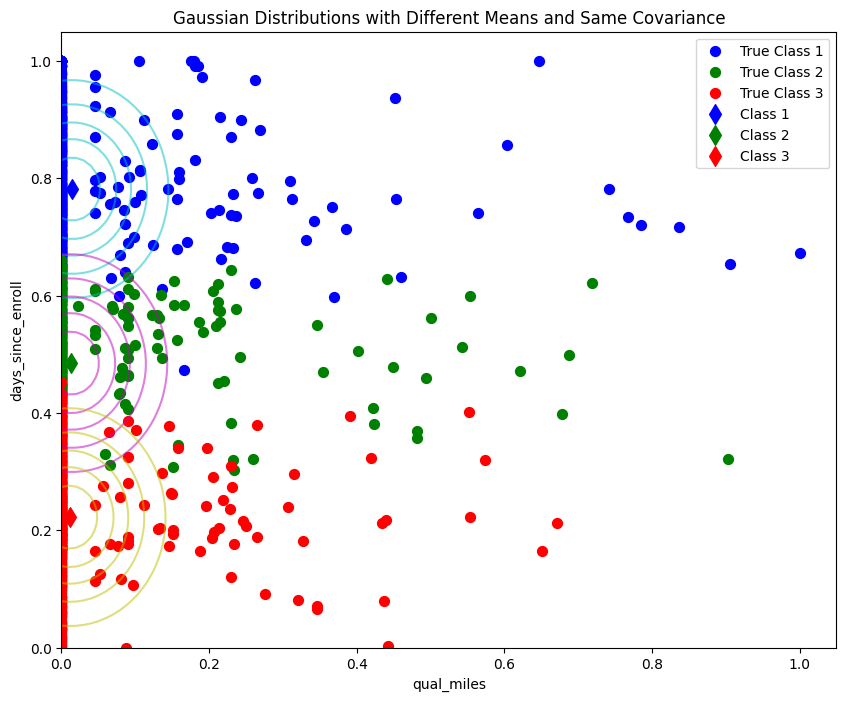

In [23]:
# Create a grid of points
x, y = np.mgrid[0:1:.01, 0:1:.01] 
pos = np.dstack((x, y))

# Calculate the Gaussian probability density function for each class
rv1 = multivariate_normal(muC1, Sigma)
rv2 = multivariate_normal(muC2, Sigma)
rv3 = multivariate_normal(muC3, Sigma)
z1 = rv1.pdf(pos)
z2 = rv2.pdf(pos)
z3 = rv3.pdf(pos)

# Plot the Gaussian distributions
plt.figure(figsize=(10, 8))
plt.contour(x, y, z1, levels=5, colors='c', alpha=0.5)
plt.contour(x, y, z2, levels=5, colors='m', alpha=0.5)
plt.contour(x, y, z3, levels=5, colors='y', alpha=0.5)

# Plot the means of each class
plt.scatter(X_C1.iloc[:,0], X_C1.iloc[:,1], marker='o', color='b', s=50, label='True Class 1')
plt.scatter(X_C2.iloc[:,0], X_C2.iloc[:,1], marker='o', color='g', s=50, label='True Class 2')
plt.scatter(X_C3.iloc[:,0], X_C3.iloc[:,1], marker='o', color='r', s=50, label='True Class 3')

plt.scatter(muC1[0], muC1[1], marker='d', color='b', s=100, label='Class 1')
plt.scatter(muC2[0], muC2[1], marker='d', color='g', s=100, label='Class 2')
plt.scatter(muC3[0], muC3[1], marker='d', color='r', s=100, label='Class 3')

plt.xlabel('qual_miles')
plt.ylabel('days_since_enroll')
plt.title('Gaussian Distributions with Different Means and Same Covariance')
plt.legend()
plt.show()

Se detallo que cuandos e realzia un ajuste a los valores de mu1,mu2,mu3 , de calcular la funcion de la probabilidad de la gaussiana de cada una de las clases vemos que se ve una mejor agrupación de los clusers detallando una mejor segemnatción que la incial construida por el equipo

Evaluación del modelo Gaussian

In [24]:
if np.any(np.isnan(X_2d)) or np.any(np.isinf(X_2d)):
    print("Warning: X_2d contiene datos nulos o infinitos ")

este es las cáracteriísticas evaluadas       qual_miles  days_since_enroll
0            0.0           0.843742
1            0.0           0.839884
2            0.0           0.847842
3            0.0           0.837955
4            0.0           0.835905
...          ...                ...
3994         0.0           0.168917
3995         0.0           0.167953
3996         0.0           0.168797
3997         0.0           0.168676
3998         0.0           0.168314

[3999 rows x 2 columns]


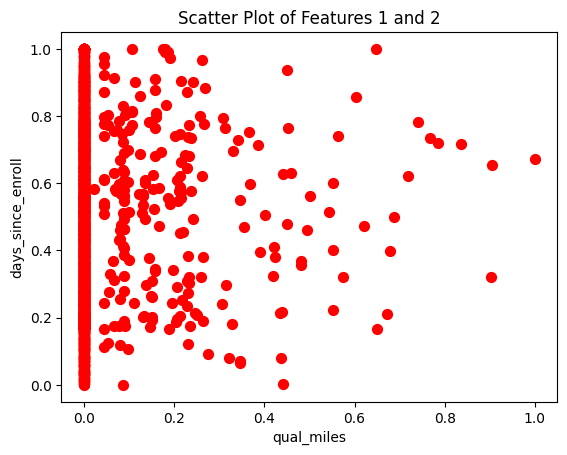

In [25]:
# Initialize parameters

X = datosAerolineas_escalados.drop('award', axis=1)
y = datosAerolineas_escalados['award']
X_2d = X.iloc[:,[1,9]]
print(f'este es las cáracteriísticas evaluadas {X_2d}')
X_2d = X_2d.to_numpy()

# Scatter plot of first two features
plt.scatter(X_2d[:, 0], X_2d[:, 1], marker='o', color='r', s=50)
plt.xlabel('qual_miles')
plt.ylabel('days_since_enroll')
plt.title('Scatter Plot of Features 1 and 2')
plt.show()


In [26]:
K = 3  # Number of clusters
n, d = X_2d.shape
epsilon = 1e-6  # Small value to prevent log(0)
# Mixing coefficients (initial uniform distribution)
pi = np.ones(K) / K
# Initialize means using random samples from data
random_indices = np.random.choice(n, K, replace=False)
mu = X_2d[random_indices, :]

In [27]:
# Function to generate a positive definite covariance matrix
def generate_positive_definite_matrix(d):
    A = np.random.randn(d, d)
    return np.dot(A, A.T) + np.eye(d) * epsilon  # Add identity for stability

# Initialize covariance matrices
Sigma = np.array([generate_positive_definite_matrix(d) for _ in range(K)])

In [28]:
# Ensure covariance matrix is positive definite
def ensure_positive_definite(Sigma):
    return Sigma + np.eye(Sigma.shape[0]) * epsilon

In [29]:
# Expectation Step (E-step)
def expectation_step(X, mu, Sigma, pi):
    """ Compute responsibilities (γ) given current parameters. """
    gamma = np.zeros((n, K))
    print("Este es el valor de Gama", gamma)
    for k in range(K):
        try:
            gamma[:, k] = pi[k] * multivariate_normal.pdf(X, mean=mu[k], cov=ensure_positive_definite(Sigma[k]))
        except np.linalg.LinAlgError:
            print(f"Warning: Fixing singular covariance matrix for cluster {k}")
            Sigma[k] = ensure_positive_definite(Sigma[k])
            gamma[:, k] = pi[k] * multivariate_normal.pdf(X, mean=mu[k], cov=Sigma[k])

    gamma += epsilon  # Prevents division by zero
    gamma /= gamma.sum(axis=1, keepdims=True)  # Normalize
    return gamma

In [30]:
# Maximization Step (M-step)
def maximization_step(X, gamma):
    """ Update parameters based on responsibilities. """
    Nk = gamma.sum(axis=0)  # Effective cluster size
    pi_new = Nk / n  # Update mixing coefficients
    mu_new = np.dot(gamma.T, X) / Nk[:, np.newaxis]  # Update means

    Sigma_new = np.zeros((K, d, d))
    for k in range(K):
        X_centered = X - mu_new[k]
        Sigma_new[k] = np.dot(gamma[:, k] * X_centered.T, X_centered) / Nk[k]
        Sigma_new[k] = ensure_positive_definite(Sigma_new[k])  # Ensure positive definiteness

    return pi_new, mu_new, Sigma_new

In [31]:
# Compute Log-Likelihood
def compute_log_likelihood(X, pi, mu, Sigma):
    """ Compute the Log-Likelihood to monitor convergence. """
    log_likelihood = 0
    for k in range(K):
        try:
            prob = pi[k] * multivariate_normal.pdf(X, mean=mu[k], cov=ensure_positive_definite(Sigma[k]))
            prob += epsilon  # Prevents log(0)
            log_likelihood += np.sum(np.log(prob))
        except np.linalg.LinAlgError:
            print(f"Warning: Fixing covariance matrix for cluster {k}")
            Sigma[k] = ensure_positive_definite(Sigma[k])
            prob = pi[k] * multivariate_normal.pdf(X, mean=mu[k], cov=Sigma[k]) + epsilon
            log_likelihood += np.sum(np.log(prob))

    return log_likelihood

Este es el valor de Gama [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Iteration 1, Log-Likelihood: 2913.3025
Este es el valor de Gama [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Iteration 2, Log-Likelihood: 2647.5217
Este es el valor de Gama [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Iteration 3, Log-Likelihood: 2230.0933
Este es el valor de Gama [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Iteration 4, Log-Likelihood: 691.1080
Este es el valor de Gama [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Iteration 5, Log-Likelihood: -1627.3812
Este es el valor de Gama [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Iteration 6, Log-Likelihood: -637.7613
Este es el valor de Gama [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Iteration 7, Log-Likelihood: -754.1574
Este e

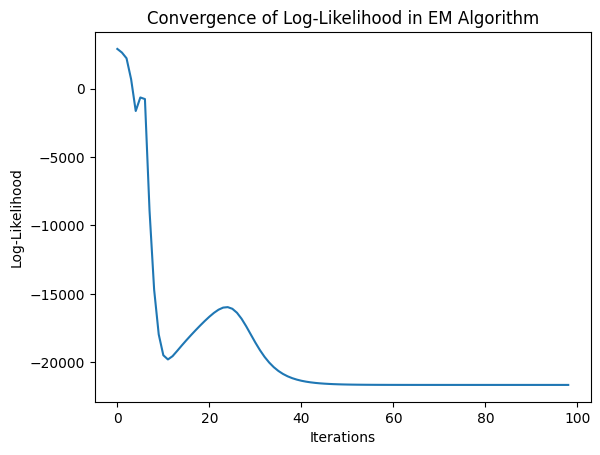

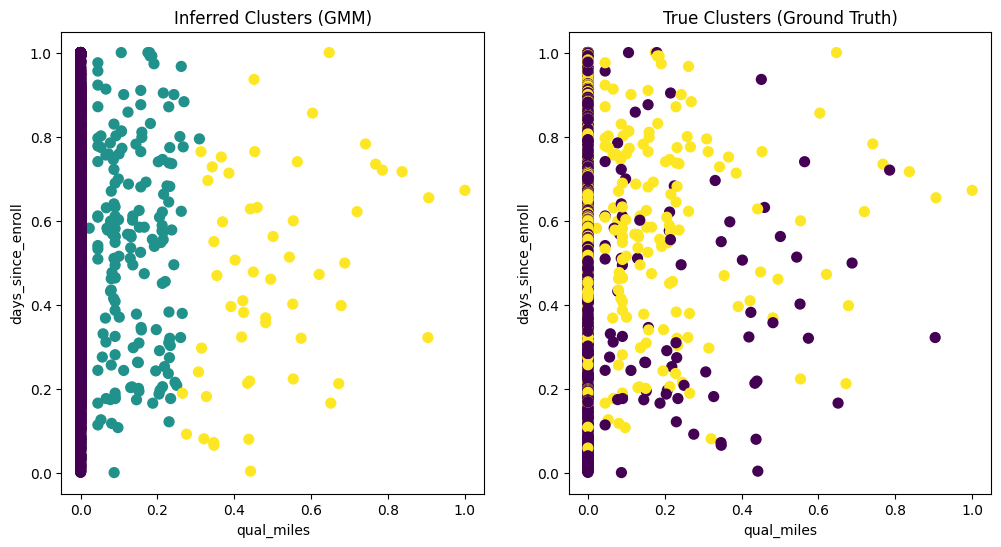

In [32]:
# EM Algorithm for GMM
max_iters = 100  # Maximum iterations
tol = 1e-4  # Convergence threshold
log_likelihoods = []
prev_log_likelihood = -np.inf  # Initialize with a very low value

for i in range(max_iters):
    gamma = expectation_step(X_2d, mu, Sigma, pi)
    pi, mu, Sigma = maximization_step(X_2d, gamma)

    # Compute log-likelihood
    log_likelihood = compute_log_likelihood(X_2d, pi, mu, Sigma)
    log_likelihoods.append(log_likelihood)

    print(f"Iteration {i+1}, Log-Likelihood: {log_likelihood:.4f}")

    # Check for convergence
    if np.abs(log_likelihood - prev_log_likelihood) < tol:
        print(f"Converged at iteration {i+1}.")
        break
    prev_log_likelihood = log_likelihood

# Plot log-likelihood evolution
plt.plot(log_likelihoods)
plt.xlabel('Iterations')
plt.ylabel('Log-Likelihood')
plt.title('Convergence of Log-Likelihood in EM Algorithm')
plt.show()

# Assign cluster labels based on maximum responsibility
Z = np.argmax(gamma, axis=1)

# Visualization: True vs Predicted Clusters
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 6))

# Plot predicted clusters
ax[0].scatter(X_2d[:, 0], X_2d[:, 1], marker='o', c=Z, s=50, cmap='viridis')
ax[0].set_xlabel('qual_miles')
ax[0].set_ylabel('days_since_enroll')
ax[0].set_title('Inferred Clusters (GMM)')

# Plot ground truth clusters
ax[1].scatter(X_2d[:, 0], X_2d[:, 1], marker='o', c=y, s=50, cmap='viridis')
ax[1].set_xlabel('qual_miles')
ax[1].set_ylabel('days_since_enroll')
ax[1].set_title('True Clusters (Ground Truth)')

plt.show()

En la interpretación de la gráfica de la convergencia por log-likelihood, en donde vemos que la verosimiltud tiene una curva alta pero se detalla varios picos, sin embargo podemos observar que la agrupación inferida por el modelo GMM con unos 3 clusters y la gra´fica de la derecha nos muestra que los verdaderos clusters son dos pero vemos que no se ve una clara agrupaciones de los clusters, lo cául recomendamos que se podría realizar tecnicas de PCA para ver una mejor segmentación de los clusters

In [38]:
from sklearn.metrics import rand_score
print(rand_score(y, Z))


0.5426038850883306


Este valor de 0.5426 nos indica que hay una  similitud moderada entre las etiquetas verdaderas y las etiquetas predichas, siendo un resultado moderado y que posiblemente este haciendo predicciones acertadas.